<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/imbalanced_classification/06_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install imblearn

In [83]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# **Info**
---
@By: Steven Bernal

@Nickname: Kaiziferr

@Git: https://github.com/Kaiziferr

#**Configuraciones**
---

In [84]:
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')
random_seed = 12354

# **Tools**
---

In [85]:
def generate_colors(paleta:str="Set1", n_colors:int=15)-> tuple:
  """color generator"""
  try:
    cmap = sns.color_palette(paleta, n_colors).as_hex()
    list_camp = ListedColormap(cmap)
    return cmap, list_camp
  except Exception as e:
    print(e)

def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  try:
    paleta = paleta if paleta !=None else generate_colors()[0]
    v = kwards
    ejeX = v["ejeX"]

    fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
    fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

    if type(ejeX) == str:
      sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
    else:
      ejeX = v['ejeX'][0]
      sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

    ax.set_ylabel(v['ejey'], size = 12)
    ax.set_xlabel(ejeX, size=fontsize-3)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
    for p in ax.patches:
      try:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center")
      except:
        pass

  except Exception as e:
    print(e)

# **Data Dictionary**
---
- `Name`: nombre de la ventana de tiempo.
- `Netflows`: cantidad de netflows en la ventana de tiempo.
- `First_Protocol`: top 1 de protocolos usados en la ventana de tiempo.
- `Second_Protocol`: top 2 de protocolos usados en la ventana de tiempo.
- `Third_Protocol`: top 3 de protocolos usados en la ventana de tiempo.
- `p1_d`: 25% de los percentiles de todas las duraciones en la ventana de tiempo
- `p2_d`: 50% de los percentiles de todas las duraciones en la ventana de tiempo
- `p3_d`: 75% de los percentiles de todas las duraciones en la ventana de tiempo
- `duration`: duración total de la ventana de tiempo
- `max_d`: valor máximo de todas las duraciones en la ventana de tiempo.
- `min_d`: valor mínimo de todas las duraciones en la ventana de tiempo.
- `#packets`: número total de paquetes en la ventana de tiempo.
- `Avg_bps`: promedio de bits por segundo en la ventana de tiempo.
- `Avg_pps`: promedio de paquetes por segundo en la ventana de tiempo.
- `Avg_bpp`: promedio de bytes por paquete en la ventana de tiempo.
- `#Bytes`: número total de bytes en la ventana de tiempo.
- `#sp`: número total de puertos de origen usados en la ventana de tiempo.
- `#dp`: número total de puertos de destino usados en la ventana de tiempo.
- `first_sp`: top 1 de los puertos de origen en la ventana de tiempo.
- `second_sp`: top 2 de los puertos de origen en la ventana de tiempo.
- `third_sp`: top 3 de los puertos de origen en la ventana de tiempo.
- `first_dp`: top 1 de los puertos de destino en la ventana de tiempo.
- `second_dp`: top 2 de los puertos de destino en la ventana de tiempo.
- `third_dp`: top 3 de los puertos de destino en la ventana de tiempo.
- `p1_ip`: 25% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p2_ip`: 50% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p3_ip`: 75% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p1_ib`: 25% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p2_ib`: 50% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p3_ib`: 75% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `Type`: tipo de ventana de tiempo
  - `benignas`: 0
  - `bitcash`: 1
  - `bitcoin`: 2
  - `ethereum `: 3
  - `monero`: 4
  - `litecoin`: 5

# **Data**
---

In [86]:
url = 'https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv'
data = pd.read_csv(url, dtype=str).drop('Unnamed: 0', axis=1)

In [87]:
data[[
    'p1_d', 'p2_d', 'p3_d',
    'duration', 'max_d', 'min_d',
    'Avg_bps', 'Avg_pps','Avg_bpp',
    'p1_ip', 'p2_ip', 'p3_ip',
    'p1_ib', 'p2_ib','p3_ib']] = data[[
    'p1_d', 'p2_d', 'p3_d',
    'duration', 'max_d', 'min_d',
    'Avg_bps', 'Avg_pps','Avg_bpp',
    'p1_ip', 'p2_ip', 'p3_ip',
    'p1_ib', 'p2_ib','p3_ib']].astype('float64')


data[[
    'Netflows', '#packets',
    '#Bytes', '#sp', '#dp']] = data[[
    'Netflows', '#packets',
    '#Bytes', '#sp', '#dp']].astype('int64')

# **Split**
---

In [88]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

I take some numeric feature for data split

In [89]:
X = data[['p1_d', 'p2_d', 'min_d', '#packets', 'Avg_bpp', 'p2_ip', 'p3_ip',
       'p2_ib']]
y = data.iloc[:,-1].astype(int)

# **Without Oversampling**

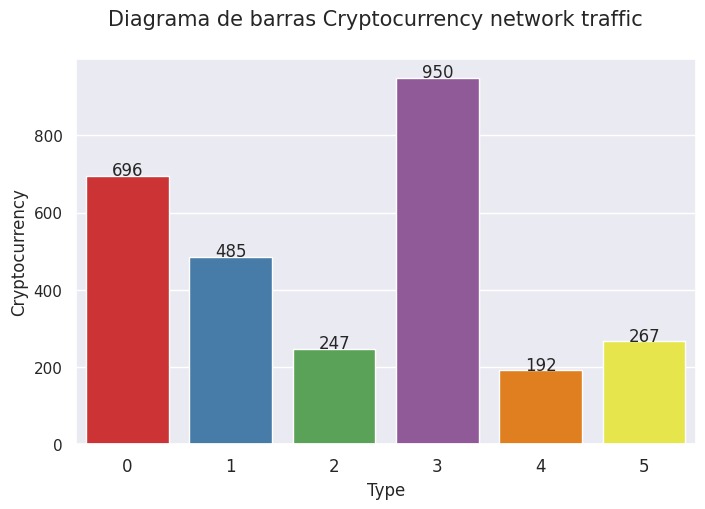

In [90]:
plot_bar(
    data,
    ejeX='Type',
    ejey='Cryptocurrency',
    title='Cryptocurrency network traffic')

# **Oversampling**
---

In [91]:
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X,y)

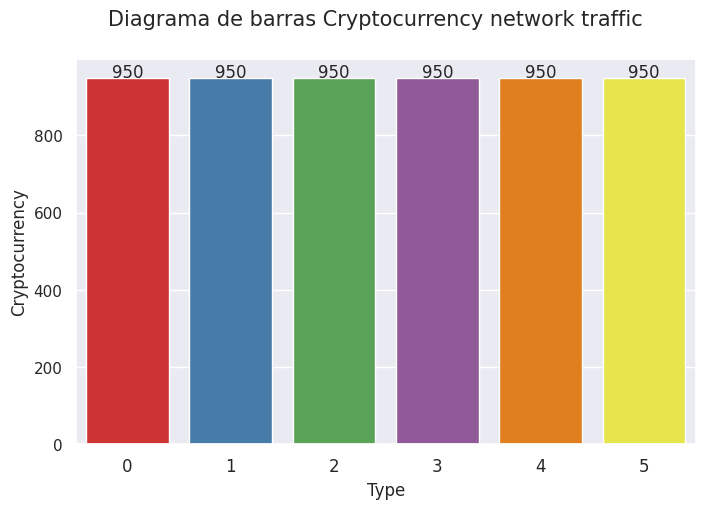

In [92]:
plot_bar(
    pd.concat([X2, y2], axis=1),
    ejeX='Type',
    ejey='Cryptocurrency',
    title='Cryptocurrency network traffic')

# **Conditional Oversample**
---

In [93]:
strategy = {2:447, 4:292, 5:467}
oversample = SMOTE(sampling_strategy=strategy)
X3, y3 = oversample.fit_resample(X, y)

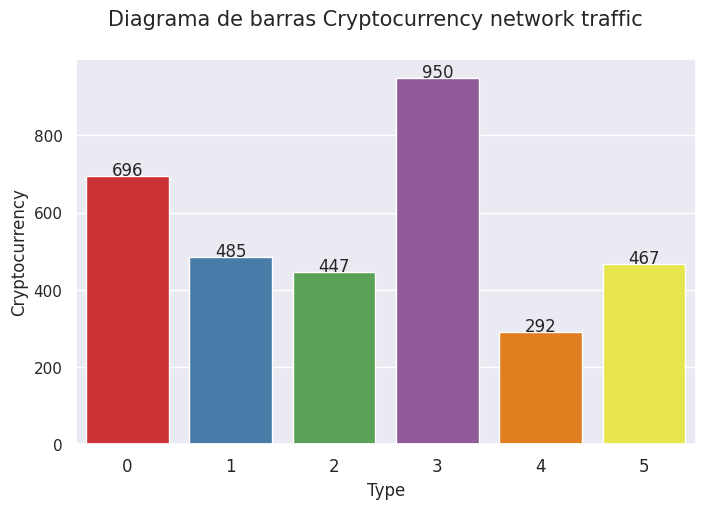

In [94]:
plot_bar(
    pd.concat([X3, y3], axis=1),
    ejeX='Type',
    ejey='Cryptocurrency',
    title='Cryptocurrency network traffic')

# **Combinate the real sample and sample sintetic**


In [95]:
list(strategy.keys())

[2, 4, 5]

In [96]:
sobremuestreo = pd.concat([X3, y3], axis=1)
sobremuestreo = sobremuestreo.query(f'Type in {list(strategy.keys())}')
sobremuestreo

,p1_d,p2_d,min_d,#packets,Avg_bpp,p2_ip,p3_ip,p2_ib,Type
1181,114.793000,180.043500,114.736000,50,394.000000,12.500000,15.000000,3820.000000,2
1182,196.182250,196.189500,196.175000,22,469.000000,11.000000,11.500000,5159.000000,2
1183,244.143250,244.143500,244.143000,32,425.000000,16.000000,16.000000,6807.500000,2
1184,244.046000,244.046000,244.046000,32,419.000000,16.000000,16.000000,6707.000000,2
1185,246.795000,246.795000,246.795000,37,376.000000,18.500000,19.250000,6959.500000,2
...,...,...,...,...,...,...,...,...,...
3332,290.677469,290.858782,290.496156,60,355.139079,30.029264,31.024387,10653.471993,5
3333,272.396121,272.396249,272.395992,44,247.483977,22.117002,23.231502,5232.265996,5
3334,265.982514,265.982514,265.982514,38,339.689898,19.440967,20.347795,6586.699145,5
3335,577.390244,577.390340,577.390147,115,409.036231,57.843367,59.765050,23676.291404,5


In [97]:
original = pd.concat([X, y], axis=1)

In [98]:
conca_data = pd.concat([original, sobremuestreo], axis=0)

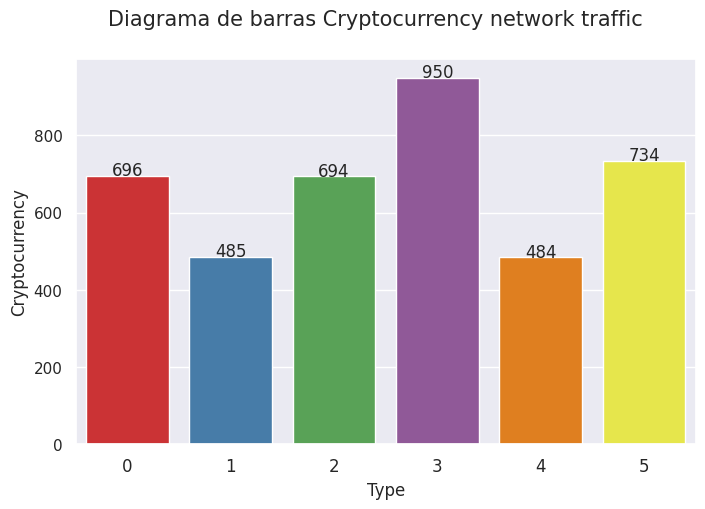

In [99]:
plot_bar(
    conca_data,
    ejeX='Type',
    ejey='Cryptocurrency',
    title='Cryptocurrency network traffic')

When using data sampling methods like SMOTE, it should only be applied to the training dataset, not the entire dataset.

# **Info**
---
@By: Steven Bernal

@Nickname: Kaiziferr

@Git: https://github.com/Kaiziferr